In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
x = tf.random.normal(shape=(3,1), mean=0, stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.13289748],
       [-1.4144585 ],
       [-0.4692588 ]], dtype=float32)>

In [4]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.64577305],
       [-0.29844365],
       [-0.02295551]], dtype=float32)>

In [9]:
v[0].assign(5)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 5.        ],
       [-0.29844365],
       [-0.02295551]], dtype=float32)>

In [13]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print("Speed: ", speed)
print("Acceleration: ", acceleration)

Speed:  tf.Tensor(19.6, shape=(), dtype=float32)
Acceleration:  tf.Tensor(9.8, shape=(), dtype=float32)


Linear classifier in pure tensorflow

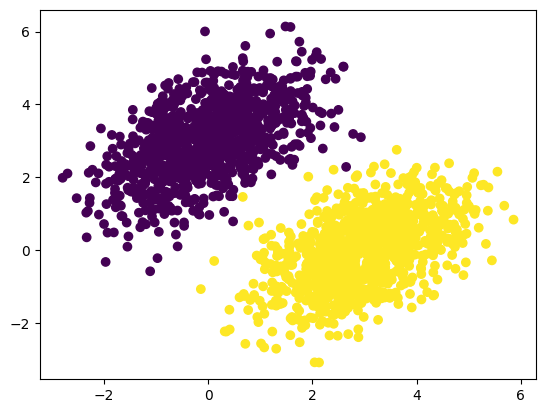

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
num_samples_per_class = 1000
negatives = np.random.multivariate_normal(mean=[0, 3], cov = [[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positives = np.random.multivariate_normal(mean=[3, 0], cov = [[1, 0.5], [0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negatives, positives)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype=np.float32), np.ones((num_samples_per_class, 1), dtype=np.float32)))
plt.scatter(inputs[:, 0], inputs[:,1], c=targets[:, 0])
plt.show()

In [17]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [18]:
def forward(x):
    return tf.matmul(inputs, W) + b

def square_loss(targets, preds):
    return tf.reduce_mean(tf.square(targets - preds))

In [20]:
lr = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        preds = forward(inputs)
        loss = square_loss(targets, preds)
    gradients = tape.gradient(loss, [W, b])
    W.assign_sub(lr*gradients[0])
    b.assign_sub(lr*gradients[1])
    return loss 


In [23]:
for epoch in range(10):
    loss = training_step(inputs, targets)
    print(f'Loss at step{epoch}: {loss}')

Loss at step0: 0.043239906430244446
Loss at step1: 0.04149913787841797
Loss at step2: 0.039912864565849304
Loss at step3: 0.03846736252307892
Loss at step4: 0.03715014085173607
Loss at step5: 0.03594982996582985
Loss at step6: 0.034856028854846954
Loss at step7: 0.03385930508375168
Loss at step8: 0.03295104205608368
Loss at step9: 0.0321233794093132


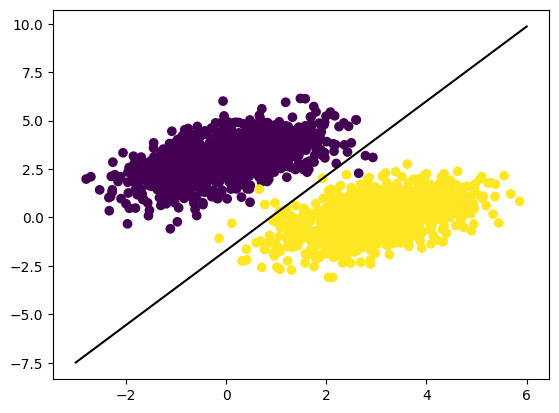

In [25]:
x = np.linspace(-3, 6, 100)
w1, w2 = W
y = (1 - 2*w1*x-2*b) / (2*w2)
plt.scatter(inputs[:, 0], inputs[:,1], c=targets[:, 0])
plt.plot(x,y,'-k')
plt.show()